Financial data exploration

Below is an analysis of the financial data from S&P500. The source of dataset is from Kaggle. We will try to explore the data to better understand the financial market as well as try to predict the stock prices. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Gather Data
I have gathered a financial dataset from Kaggle.
Start loading the data.
    

In [2]:
df = pd.read_csv('financials.csv')

# Data exploration
First, we will do some data exploration to understand the data quality and the information at hand. 
This includes:
1. checking the dataframe head to see the variables
2. checking the dataframe shape to see the column of data in terms of rows and columns
3. describe function to see the statistical distribution of the variables
4. checking for missing values

In [3]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
df.shape

(505, 14)

In [5]:
df.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


In [6]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

## Data exploration result: 
1. There are 2 variables with missing values that we will need to deal with later. 
2. There are 10 numerical variables and 4 categorical variables. 
3. Some variables like company name and Symbol provide the same information, so we can drop one of them
4. The SEC Filing column can also be dropped as it provides a link, which in itself does not provide any information

# Clean Data
We select the columns of interest:
1. Delete the Symbol column, this information is already given by the Name column. 
2. Delete SEC Filing column, it provides no information in itself.


In [7]:
#there are 10 numerical variables and 4 categorical variables. 
#we proceed to drop 2 categorical variables: company(we already have the company symbol) and the SEC filings(which is a web link, so provides no value to our analysis)
df1 = df.drop(['Symbol', 'SEC Filings'], axis=1)

In [8]:
#check the new df1
df1.head()

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62


# Analyze data
 Analyse data to gain better understanding. 
1. How can we better understand the dataset at hand?
2. Are there are patterns?
3. Are any variable correlation that we should be aware of? 
4. What can we use to predict stock prices? 
5. Can we predict stock prices?

In [9]:
#check how many different sectors there are
df1['Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

In [10]:
#check how many companies belong to each sector and their percentage of the total
sector_count = df1['Sector'].value_counts().reset_index()
sector_count.columns = ['Sector', 'Count']
sector_count['percentage'] = sector_count['Count']/sector_count['Count'].sum() * 100
sector_count

,Sector,Count,percentage
0,Consumer Discretionary,84,16.633663
1,Information Technology,70,13.861386
2,Financials,68,13.465347
3,Industrials,67,13.267327
4,Health Care,61,12.079208
5,Consumer Staples,34,6.732673
6,Real Estate,33,6.534653
7,Energy,32,6.336634
8,Utilities,28,5.544554
9,Materials,25,4.950495


Text(0.5, 1.0, 'S&P500 sector percentage distribution by company count')

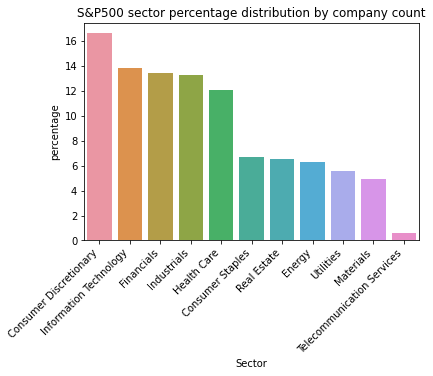

In [11]:
#plot the distribution of sector for better visualization
graph = sns.barplot(x='Sector', y='percentage', data = sector_count)
plt.xticks(rotation=45, ha='right')
plt.title('S&P500 sector percentage distribution by company count')

In [12]:
#more than 57% of the companies in S&P500 belong to the top 5 sectors. 
top5_company_number = sector_count['percentage'][:4].sum()
top5_company_number

57.22772277227723

In [13]:
#let's see the composition by marketcap

mktcap_count = df1.groupby('Sector')['Market Cap'].sum().reset_index()
mktcap_count.columns = ['Sector', 'Market Cap']
mktcap_count['percentage'] = mktcap_count['Market Cap']/mktcap_count['Market Cap'].sum() * 100
mktcap_count = mktcap_count.sort_values(by='percentage', ascending=False)

Text(0.5, 1.0, 'S&P500 sector percentage distribution by market cap')

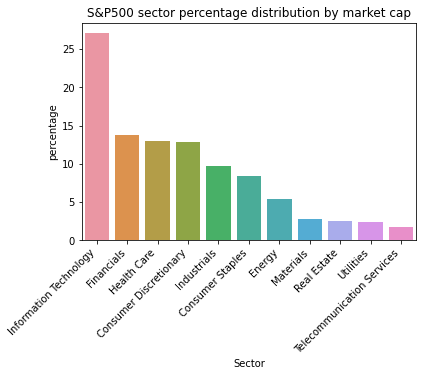

In [14]:
#plot the distribution of market cap per sector for better visualization
graph = sns.barplot(x='Sector', y='percentage', data = mktcap_count)
plt.xticks(rotation=45, ha='right')
plt.title('S&P500 sector percentage distribution by market cap')

In [15]:
# see that eventho there are more number of companies in certain sectors, tech sector leads the market cap by far
top5_mktcap = mktcap_count['percentage'][:4].sum()
top5_mktcap
#we see that the top 5 sectors take up to 67% of total market cap.

66.86941792488231

### Question 1: How can we better understand the dataset at hand?

By dividing the data in sectors, it is easier to understand the market structure. 
We can see that the 5 sectors make up for more then 57% of the total companies in the S&P500, and they make up to 67% of the total market cap.
Which suggests that these sectors are driving the economy and business trends currently. 

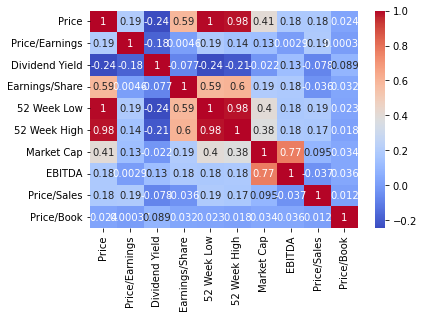

In [16]:
#For the second question, we are going to use heatmap first to see if there are any correlation patterns
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

From the heatmap,we can observe that there are 2 variables that are highly correlated with Price,they are direct price variables which are 52 week High/Low. These variables are a variation of the target variable Price, so we will drop them for the modeling step later. 
The next variables most correlated with Price are:Earning/Share, Market/Cap and Dividend Yield. 

To further investigate any patterns, I am going to take the below steps: 

1. create a function that calculates the sector mean for each variable
2. use the function to fill in the missing values in 2 variables with missing value
(I'm choosing to use sector mean instead of general mean for better precision)
3. using the variable means created, define a function that would take in any variable and plot the distribution of the stock market by sector on those mean values, to observe is there are any patterns.

In [17]:
#create funtion to calculate sector mean for each variable
def fill_na_sector_mean(df, col_name, groupby_col):
    """
    fill in the missing values with the sector mean of that column
    
    input: 
    df(pandas dataframe): dataframe
    col_name (str): the name of the column with missing values to fill
    group_by (str): the name of the column to group by
    
    output: 
    updated datafrasme with the mising values filled.
    """
    #calculate the mean value of the column per sector
    sector_mean = df.groupby(groupby_col)[col_name].transform('mean')
    
    #fill the missing values with the above mean
    df[col_name].fillna(sector_mean, inplace=True)
    

In [18]:
#fill missing values for the column P/E
fill_na_sector_mean(df1, 'Price/Earnings', 'Sector')

In [19]:
#fill missing values in the column P/B
fill_na_sector_mean(df1, 'Price/Book', 'Sector')

In [21]:
#check that it worked
df1.isnull().sum()

Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
dtype: int64

We can see that there are no missing values anymore. 

In [22]:
# So we are going to see how and if these vary by sector
#first, create a table of mean for each variable by sector
mean_sector = df1.groupby('Sector').mean().reset_index()
mean_sector

,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,Consumer Discretionary,124.034524,25.536024,1.572412,4.879048,146.931427,96.092364,3.825670e+10,3.501797e+09,2.275769,29.405542
1,Consumer Staples,79.764118,21.963235,2.433391,3.659412,92.832285,68.929441,6.138460e+10,5.291986e+09,2.869688,58.074545
2,Energy,57.887500,38.559063,2.014452,-1.648438,72.589687,48.141234,4.241605e+10,4.438905e+09,3.689595,2.440000
3,Financials,89.056029,17.198971,2.017241,4.436912,101.821849,72.694468,5.062720e+10,5.290676e+08,3.358182,6.735294
4,Health Care,132.515738,23.437833,0.917243,4.340492,160.758534,103.719253,5.318621e+10,3.657468e+09,4.827239,9.005667
5,Industrials,116.887612,21.494328,1.479392,5.344030,134.579476,90.837024,3.599315e+10,3.063030e+09,2.573401,9.459375
6,Information Technology,119.242857,37.179857,1.228494,3.110000,138.778641,91.891416,9.610174e+10,6.161996e+09,5.880142,10.873571
7,Materials,102.386800,20.542400,1.737976,4.932000,118.038852,85.583248,2.769201e+10,2.284348e+09,2.876093,4.788800
8,Real Estate,88.712727,22.459091,3.894758,2.391212,110.550455,82.878088,1.894896e+10,1.384265e+09,9.962681,6.004848
9,Telecommunication Services,33.603333,11.190000,7.567797,4.426667,41.693333,29.503667,1.510142e+11,3.365833e+10,1.511056,3.716667


In [23]:
#create a function to visualize the distribution of any variable mean by sector
def plot_mean_by_sector(df, col_name):
    """
    Plot the distribution of the variable chosen by sector
    
    input:
    df: dataframe with the mean of each sector
    col_name: variable of interest to be plotted
    
    output:
    a seaborn distribution bar plot with sector in X-axis and the variable of interest in the y-axis
    
    """
    meanbysec = df.sort_values(by=col_name, ascending=False)
    praph = sns.barplot(x='Sector', y=col_name, data = meanbysec)
    plt.xticks(rotation=45, ha='right')
    plt.show()

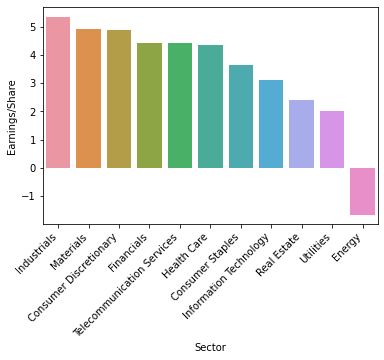

In [24]:
plot_mean_by_sector(mean_sector, 'Earnings/Share')

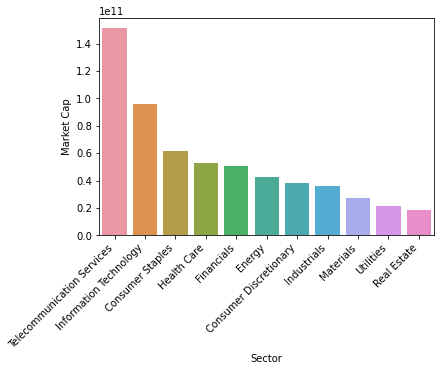

In [25]:
plot_mean_by_sector(mean_sector, 'Market Cap')

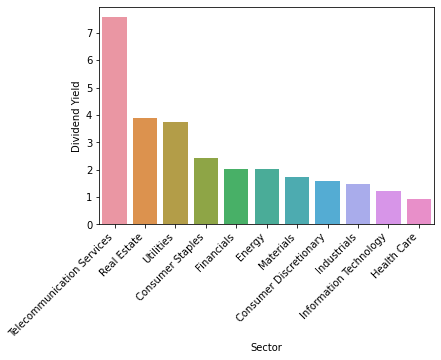

In [26]:
plot_mean_by_sector(mean_sector, 'Dividend Yield')

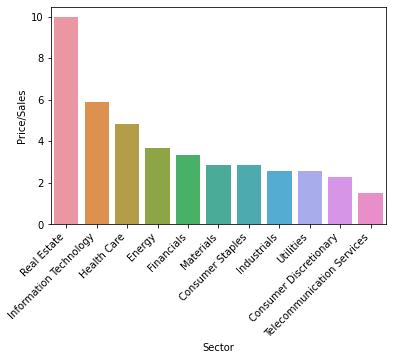

In [27]:
plot_mean_by_sector(mean_sector, 'Price/Sales')

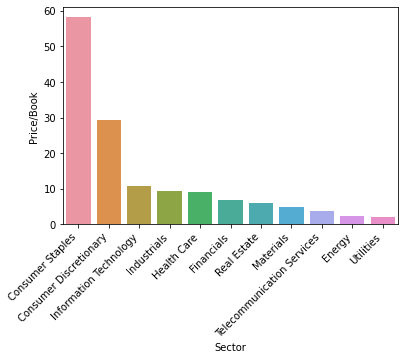

In [28]:
plot_mean_by_sector(mean_sector, 'Price/Book')

### Question 2: Are there are patterns?
While there is a pattern matching the 5 top sectors that dominate the market both by size and by number. This pattern does not apply to the other financial metrics. Which suggests that the different metrics does not apply in the same way to all the sectors.
### Question 3:  Are there any variable correlation that we should be aware of? 
The 52 week high/low prices variable are directly related to the target variable price, so we need to drop them for the modelling step.

### Question 4: What can we use to predict stock prices? 
All the other financial metrics including the sector variable are good variables to use to predict stock prices.

# Prepare data for modelling
1. Drop columns identified as not needed: 52 week high/low
2. The finacial metrics are measures that vary too much in magnitude, so we will standardize them for modelling
3. We will get dummy values for the categoriacal variables for the modelling
4. will use sklearn to prepare train and test data, apply the models and measure the result
5. we create the target variable- Price- as Y
6. we create X by dropping the target variable and the forementioned 2 variables related to target price.

In [30]:

y = df1['Price']
X = df1.drop(['Name','Price','52 Week High', '52 Week Low'], axis=1)

In [31]:
X.columns

Index(['Sector', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share',
       'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book'],
      dtype='object')

In [32]:
num_col = ['Price/Earnings', 'Dividend Yield', 'Earnings/Share',
       'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']
cat_col = ['Sector']

In [33]:
#we normalize numeric values and get dummies for the categorical values
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_col), ('cat', OneHotEncoder(), cat_col)])
X_processed = preprocessor.fit_transform(X)
X_processed

array([[-0.01208986,  0.28450258,  0.73305718, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07181406, -0.48707325, -0.36135807, ...,  0.        ,
         0.        ,  0.        ],
       [-0.05586582,  0.00848407, -0.61472751, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.25504644, -0.71701891,  0.92484377, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17211532, -0.2702499 , -0.20300216, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19438675, -0.79025078, -0.37015562, ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
#import modeluos to split data for training anf testing and the metrics for evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)



# Modeling

Choosig model: I have decided to start with a linear regression model as it is easier to interpret the result

In [35]:
#linear regression model, I start with the linear model beacuse it is the easierst to interpret the result:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
y_lmpredict = lm_model.predict(X_test)

In [36]:
#evaluate the linear regression model 
lm_mae =mean_absolute_error(y_test, y_lmpredict)
lm_mae

50.144340529048215

### Interpret the result: 
mae (Mean absolute error) is used here because it maintains the price unit, which makes it easier to understand the error rate. We see that the mean absolute error is about $50. Given that the stock prices range form few dollars to thausands, it is hard to tell how good this is. 
In order to get a better understing we are going to use r2_score below. 

In [37]:
#use r2 score to evaluate the % of the variance in the target variable that is explained by the independent variables
lm_r2 = r2_score(y_test, y_lmpredict)
lm_r2

0.46991596005306113

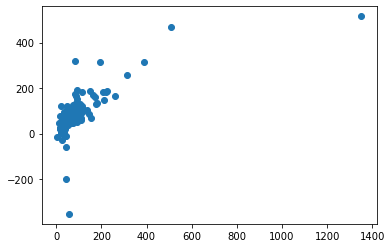

In [38]:
#check viasually how the predictions compare to real prices. 
plt.scatter(y_test, y_lmpredict)

### Interpret r2_score: 

The r2_score indicates that the variables used account for 47% of the prices being predicted. 
This tells us that the variables or the financial metrics used are relevant and do have a impact on the price, however it does not account for all the factors that influence the price. 

Now that we have a better understanding of how these variables affcet the price, we are going to use another algorith to predict price, to see if there are any significant impruvements. We are using a decision tree below. 

In [39]:
#try a different model to see if it improves the prediction results
#Decision Tree model:
from sklearn.tree import DecisionTreeRegressor
dtmodel = DecisionTreeRegressor(random_state=42)
dtmodel.fit(X_train, y_train)
y_dtpredict = dtmodel.predict(X_test)

In [40]:
mae = mean_absolute_error(y_test, y_dtpredict)
mae

49.584851485148505

In [41]:
#compared to the linear model, the improvement is not huge. 
#we focus on linear model as it is easier to interpret

Text(0, 0.5, 'Predicted price')

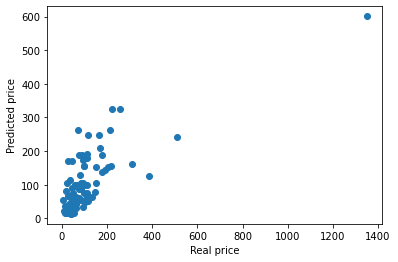

In [42]:
plt.scatter(y_test, y_dtpredict)
plt.xlabel('Real price')
plt.ylabel('Predicted price')

The decision tree model has achieved a slightly lower MAE, but the difference is not huge. 

# Conclusion

The variables available in the dataset can only account for about 50% of the stock price, there are other factors that needs to be taken into consideration to get a better price prediction. Further study needs to be done to gather more information if we want to create a model that predicts the price more precisely. 

However with this project, we can conclude that the financial metrics available in the dataset can be used as generic guideline or a baseline to start understanding the stock valuations.